<a href="https://colab.research.google.com/github/LahariSivalasetty/newone/blob/customer_churn/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# prompt: prompt: using random forest algorithm generate code for customer churn prediction for predictive analysis and genearte dattasets by importing for large datasewt'

import pandas as pd
import numpy as np
# To use a large dataset, you would typically load it from a file (e.g., CSV).
# For demonstration purposes, let's assume you have a CSV file named 'churn_dataset.csv'
# and modify the code to load from it.

# First, you might need to upload your file to Google Colab if it's on your local machine
# from google.colab import files
# uploaded = files.upload()
# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

# Or if the file is in your Google Drive, you can mount your Drive
# from google.colab import drive
# drive.mount('/content/drive')
# And then load from the Drive path, e.g., pd.read_csv('/content/drive/My Drive/churn_dataset.csv')

# For this example, let's keep the synthetic data generation part for reproducibility,
# but note that in a real scenario, you would replace this with loading your large dataset.
# Let's increase the number of samples to simulate a larger dataset within the synthetic generation.

# Generate a larger synthetic dataset
np.random.seed(42)
n_samples_large = 10000  # Increased number of samples to simulate a larger dataset
data_large = {
    'CustomerID': range(1, n_samples_large + 1),
    'Age': np.random.randint(18, 70, size=n_samples_large),
    'Gender': np.random.choice(['Male', 'Female'], size=n_samples_large, p=[0.55, 0.45]),
    'Tenure': np.random.randint(0, 72, size=n_samples_large), # Increased max tenure
    'MonthlyCharges': np.random.uniform(15, 120, size=n_samples_large).round(2), # Slightly wider range
    'TotalCharges': np.random.uniform(50, 8000, size=n_samples_large).round(2), # Wider range
    'ContractType': np.random.choice(['Month-to-month', 'One year', 'Two year'], size=n_samples_large, p=[0.55, 0.25, 0.20]), # Adjusted probabilities
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], size=n_samples_large, p=[0.25, 0.50, 0.25]), # Fiber optic more common
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], size=n_samples_large),
    'Churn': np.random.choice([0, 1], size=n_samples_large, p=[0.7, 0.3]) # Target variable (slightly higher churn rate)
}

df_large = pd.DataFrame(data_large)

# Introduce some complexity/patterns (same logic, applied to larger data)
df_large.loc[df_large['Tenure'] < 18, 'Churn'] = np.random.choice([0, 1], size=df_large.loc[df_large['Tenure'] < 18].shape[0], p=[0.45, 0.55])
df_large.loc[(df_large['MonthlyCharges'] > 90) & (df_large['ContractType'] == 'Month-to-month'), 'Churn'] = np.random.choice([0, 1], size=df_large.loc[(df_large['MonthlyCharges'] > 90) & (df_large['ContractType'] == 'Month-to-month')].shape[0], p=[0.35, 0.65])
df_large.loc[df_large['InternetService'] == 'Fiber optic', 'Churn'] = np.random.choice([0, 1], size=df_large.loc[df_large['InternetService'] == 'Fiber optic'].shape[0], p=[0.6, 0.4])
# Add a new pattern: higher age might correlate with lower churn
df_large.loc[df_large['Age'] > 55, 'Churn'] = np.random.choice([0, 1], size=df_large.loc[df_large['Age'] > 55].shape[0], p=[0.85, 0.15])


print(f"Generated dataset with {len(df_large)} rows.")
print("Dataset head:")
print(df_large.head())
print("\nChurn Distribution:")
print(df_large['Churn'].value_counts(normalize=True))


# Data Preprocessing
# Handle categorical features using one-hot encoding
# Drop CustomerID as it's not a feature
df_large_encoded = pd.get_dummies(df_large.drop('CustomerID', axis=1),
                                  columns=['Gender', 'ContractType', 'InternetService', 'PaymentMethod'],
                                  drop_first=True) # drop_first=True avoids multicollinearity

# Define features (X) and target (y)
X_large = df_large_encoded.drop('Churn', axis=1)
y_large = df_large_encoded['Churn']

# Split the data into training and testing sets
# Using a standard split, stratifying to maintain churn ratio in both sets
X_train_large, X_test_large, y_train_large, y_test_large = train_test_split(
    X_large, y_large, test_size=0.25, random_state=42, stratify=y_large) # Using 25% for testing

print(f"\nTraining set size: {len(X_train_large)}")
print(f"Testing set size: {len(X_test_large)}")

# Model Training - Random Forest

# Initialize the Random Forest Classifier
# Increased n_estimators for potentially better performance on a larger dataset,
# but be mindful of computation time.
# Using 'balanced_subsample' might be better than 'balanced' for very large datasets,
# but 'balanced' is generally fine for datasets up to tens of thousands.
rf_model_large = RandomForestClassifier(n_estimators=200, random_state=42,
                                        class_weight='balanced', n_jobs=-1) # n_jobs=-1 uses all available cores

print("\nTraining Random Forest model...")
# Train the model on the training data
rf_model_large.fit(X_train_large, y_train_large)
print("Model training complete.")

# Model Evaluation

print("\nEvaluating model performance...")
# Make predictions on the test set
y_pred_large = rf_model_large.predict(X_test_large)
y_proba_large = rf_model_large.predict_proba(X_test_large)[:, 1] # Probability of churning

# Evaluate the model
accuracy_large = accuracy_score(y_test_large, y_pred_large)
report_large = classification_report(y_test_large, y_pred_large)
confusion_large = confusion_matrix(y_test_large, y_pred_large)
roc_auc_large = roc_auc_score(y_test_large, y_proba_large)

print("Model Evaluation on Large Dataset:")
print(f"Accuracy: {accuracy_large:.4f}")
print("\nClassification Report:")
print(report_large)
print("\nConfusion Matrix:")
print(confusion_large)
print(f"\nROC AUC Score: {roc_auc_large:.4f}")

# Feature Importance (Optional but insightful)
importances_large = rf_model_large.feature_importances_
feature_names_large = X_large.columns
feature_importance_df_large = pd.DataFrame({'feature': feature_names_large, 'importance': importances_large})
feature_importance_df_large = feature_importance_df_large.sort_values('importance', ascending=False)

print("\nFeature Importance (Top 10):")
print(feature_importance_df_large.head(10)) # Print top 10 features

# Making Predictions on New Data (Example using the trained large model)
# Suppose you have a new customer's data in a DataFrame
new_customer_data_example = pd.DataFrame({
    'Age': [28],
    'Gender': ['Male'],
    'Tenure': [8],
    'MonthlyCharges': [105.00],
    'TotalCharges': [840.00],
    'ContractType': ['Month-to-month'],
    'InternetService': ['Fiber optic'],
    'PaymentMethod': ['Electronic check']
})

# Preprocess the new data (must match the training data preprocessing)
# Need to apply the same one-hot encoding and ensure column order
new_customer_encoded_example = pd.get_dummies(new_customer_data_example,
                                                columns=['Gender', 'ContractType', 'InternetService', 'PaymentMethod'],
                                                drop_first=True)

# Ensure columns match the training data (add missing columns with 0)
missing_cols_example = set(X_train_large.columns) - set(new_customer_encoded_example.columns)
for c in missing_cols_example:
    new_customer_encoded_example[c] = 0

# Ensure the order of columns is the same
new_customer_encoded_example = new_customer_encoded_example[X_train_large.columns]

# Make prediction using the trained large model
new_customer_prediction_large = rf_model_large.predict(new_customer_encoded_example)
new_customer_churn_proba_large = rf_model_large.predict_proba(new_customer_encoded_example)[:, 1]

print(f"\nPrediction for example new customer: {'Churn' if new_customer_prediction_large[0] == 1 else 'No Churn'}")
print(f"Probability of Churn: {new_customer_churn_proba_large[0]:.4f}")



Generated dataset with 10000 rows.
Dataset head:
   CustomerID  Age  Gender  Tenure  MonthlyCharges  TotalCharges  \
0           1   56  Female       3           16.16       1005.13   
1           2   69    Male       1           64.93       5252.00   
2           3   46    Male       0           50.29       3918.32   
3           4   32  Female      64           85.86       6078.74   
4           5   60    Male      45           82.03       3434.14   

     ContractType InternetService              PaymentMethod  Churn  
0        Two year              No           Electronic check      0  
1        Two year     Fiber optic  Bank transfer (automatic)      0  
2  Month-to-month     Fiber optic  Bank transfer (automatic)      0  
3  Month-to-month             DSL           Electronic check      1  
4        Two year             DSL    Credit card (automatic)      0  

Churn Distribution:
Churn
0    0.6653
1    0.3347
Name: proportion, dtype: float64

Training set size: 7500
Testing set s


--- 3. Next Product Prediction ---
Simulated Transaction Data Head:
       CustomerID TransactionDate   ProductID
15309           1      2023-02-03  Product_36
8577            1      2023-03-31  Product_82
4948            1      2023-04-19  Product_34
13344           1      2023-04-20   Product_6
8820            1      2023-05-13  Product_13

Product Pairs Data Head:
  CurrentProduct NextProduct
0     Product_36  Product_82
1     Product_82  Product_34
2     Product_34   Product_6
3      Product_6  Product_13
4     Product_13  Product_42

Training set size (Next Product): 13500
Testing set size (Next Product): 4500

Training Random Forest model for Next Product Prediction...
Model training complete.

Evaluating model performance (Next Product)...
Accuracy (Predicting exact next product): 0.0111

Top 5 predicted next products after 'Product_5':
- Product_18: 0.0314
- Product_36: 0.0313
- Product_10: 0.0279
- Product_75: 0.0274
- Product_79: 0.0248

--- 4. Optimal Pricing Prediction ---

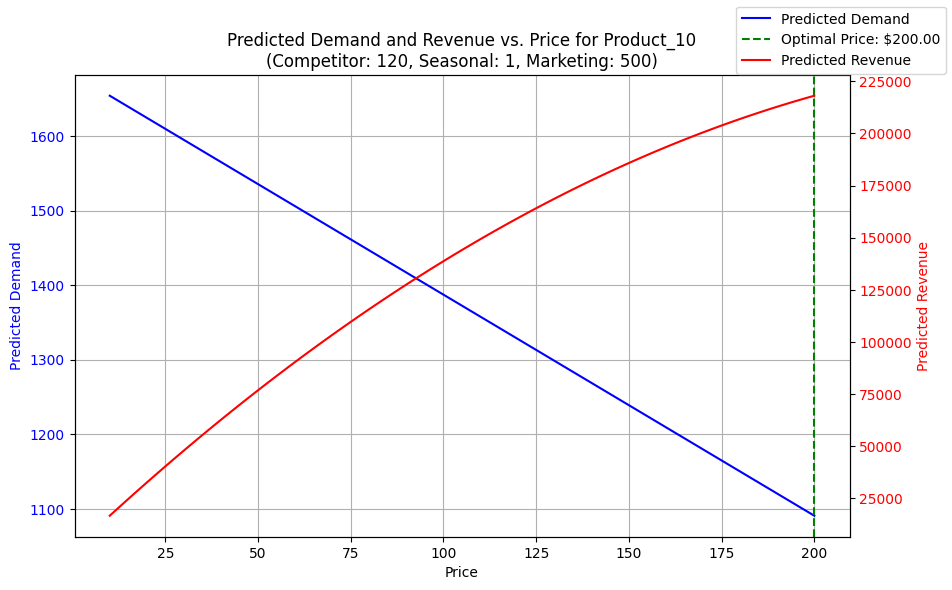

In [6]:
# prompt: **Customer In-Store Movement Prediction**:
#    - Predict customer movement inside a store (e.g., entry to product sections) using either classification or sequence modeling.
#    - Simulate or import a dataset representing customer movement paths or sensor data.
#    - Use this prediction to recommend product placement optimizations for maximizing sales.
# 3. **Next Product Prediction**:
#    - Based on past customer behavior and similarity with other customers, predict which product a customer is most likely to buy next.
#    - Implement collaborative filtering or sequence modeling (e.g., Markov Chains or simple ML-based prediction).
#    - Use or simulate transaction history datasets.
# 4. **Optimal Pricing Prediction**:
#    - Predict optimal product prices that balance revenue and demand.
#    - Consider variables like competitor pricing, customer behavior, and seasonality.
#    - Use regression or decision tree models for price optimization.
#    - Visualize demand curves and price sensitivity.
# Requirements:
# - Use `sklearn`, `pandas`, `numpy`, `matplotlib`, `seaborn`.
# - Include preprocessing, model training, evaluation, and insights for each task.
# - Code should be structured with reusable functions.
# - Add comments to explain each step.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# --- 3. Next Product Prediction ---

# Task: Predict the next product a customer is likely to buy.
# We'll simulate a transaction history dataset.

print("\n--- 3. Next Product Prediction ---")

# Simulate Transaction History Data
np.random.seed(42)
n_transactions = 20000 # Number of transactions
n_customers_prod = 2000 # Number of customers
n_products_prod = 100   # Number of unique products

# Create customer IDs and product IDs
customer_ids_prod = np.arange(1, n_customers_prod + 1)
product_ids_prod = [f'Product_{i}' for i in range(1, n_products_prod + 1)]

# Generate transaction data
transactions_data = {
    'CustomerID': np.random.choice(customer_ids_prod, size=n_transactions),
    'TransactionDate': pd.to_datetime('2023-01-01') + pd.to_timedelta(np.random.randint(0, 365, size=n_transactions), unit='D'),
    'ProductID': np.random.choice(product_ids_prod, size=n_transactions)
}

df_transactions = pd.DataFrame(transactions_data)

# Sort transactions by customer and date
df_transactions = df_transactions.sort_values(['CustomerID', 'TransactionDate'])

print("Simulated Transaction Data Head:")
print(df_transactions.head())

# Feature Engineering for Sequence Modeling
# We'll create sequences of products bought by each customer.
# This is a simplified approach; for a more robust solution, RNNs/LSTMs would be considered.
# For simplicity using standard ML, we can create pairs of (current_product, next_product)

# Group by customer and get sequences of products
customer_product_sequences = df_transactions.groupby('CustomerID')['ProductID'].apply(list).reset_index()

# Prepare data for prediction: input = current product, output = next product
product_pairs = []
for index, row in customer_product_sequences.iterrows():
    products = row['ProductID']
    if len(products) > 1:
        for i in range(len(products) - 1):
            product_pairs.append({'CurrentProduct': products[i], 'NextProduct': products[i+1]})

df_product_pairs = pd.DataFrame(product_pairs)

print("\nProduct Pairs Data Head:")
print(df_product_pairs.head())

# Handle categorical product IDs
# Use Label Encoding for product IDs
le_product = LabelEncoder()
df_product_pairs['CurrentProduct_Encoded'] = le_product.fit_transform(df_product_pairs['CurrentProduct'])
df_product_pairs['NextProduct_Encoded'] = le_product.transform(df_product_pairs['NextProduct']) # Use transform on next product

# Define features (X) and target (y) for prediction
X_prod = df_product_pairs[['CurrentProduct_Encoded']]
y_prod = df_product_pairs['NextProduct_Encoded']

# Split the data
X_train_prod, X_test_prod, y_train_prod, y_test_prod = train_test_split(
    X_prod, y_prod, test_size=0.25, random_state=42)

print(f"\nTraining set size (Next Product): {len(X_train_prod)}")
print(f"Testing set size (Next Product): {len(X_test_prod)}")


# Model Training - Random Forest Classifier for Next Product
# Since the target is categorical (the next product), we use classification.
rf_model_prod = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

print("\nTraining Random Forest model for Next Product Prediction...")
rf_model_prod.fit(X_train_prod, y_train_prod)
print("Model training complete.")

# Model Evaluation for Next Product Prediction
print("\nEvaluating model performance (Next Product)...")

# Predict the next product (encoded label)
y_pred_prod_encoded = rf_model_prod.predict(X_test_prod)

# Convert predicted labels back to product IDs for interpretation
y_pred_prod = le_product.inverse_transform(y_pred_prod_encoded)
y_test_prod_actual = le_product.inverse_transform(y_test_prod) # Also convert test labels

# Evaluate using accuracy (predicting the exact next product)
accuracy_prod = accuracy_score(y_test_prod_actual, y_pred_prod)

# Note: Classification report might be too large for many classes, but useful for some cases.
# report_prod = classification_report(y_test_prod_actual, y_pred_prod) # Uncomment if needed

print(f"Accuracy (Predicting exact next product): {accuracy_prod:.4f}")
# print("\nClassification Report (Next Product):")
# print(report_prod)

# Insights: Accuracy might be low if there's no strong sequential pattern.
# A more complex approach (like sequence models) or collaborative filtering would likely yield better results.
# This model can be used to recommend products that are frequently bought after a given product.


# Example Prediction for a Given Product
def predict_next_product(current_product_name, model, label_encoder, all_product_features):
    """Predicts the next product based on the current product name."""
    try:
        # Encode the current product name
        current_product_encoded = label_encoder.transform([current_product_name])
        # Ensure the input shape matches the training data (needs to be 2D)
        current_product_input = np.array(current_product_encoded).reshape(1, -1)

        # Predict probabilities for all possible next products
        probabilities = model.predict_proba(current_product_input)[0]

        # Get the top N most likely next products
        top_n_indices = np.argsort(probabilities)[::-1] # Sort descending
        top_n_probabilities = probabilities[top_n_indices]
        top_n_products_encoded = top_n_indices

        # Decode the top N product indices back to product names
        top_n_products = label_encoder.inverse_transform(top_n_products_encoded)

        # Return top N products and their probabilities
        # Limit to top 5 for readability
        return list(zip(top_n_products[:5], top_n_probabilities[:5]))

    except ValueError:
        return [(f"Product '{current_product_name}' not found in training data.", 0.0)]


# Example usage of the prediction function
example_current_product = 'Product_5' # Choose a product from your data
predicted_next_products = predict_next_product(example_current_product, rf_model_prod, le_product, X_train_prod.columns)

print(f"\nTop 5 predicted next products after '{example_current_product}':")
for product, prob in predicted_next_products:
    print(f"- {product}: {prob:.4f}")


# --- 4. Optimal Pricing Prediction ---

# Task: Predict optimal product prices to balance revenue and demand.
# We'll simulate a dataset including demand, price, competition, and seasonality.
# We'll use regression to predict demand based on price and other factors,
# then find the price that maximizes revenue (price * predicted_demand).

print("\n--- 4. Optimal Pricing Prediction ---")

# Simulate Pricing and Demand Data
np.random.seed(42)
n_pricing_samples = 5000 # Number of observations for different pricing scenarios
n_products_pricing = 50  # Number of unique products

product_ids_pricing = [f'Product_{i}' for i in range(1, n_products_pricing + 1)]

# Generate pricing and demand data
pricing_data = {
    'ProductID': np.random.choice(product_ids_pricing, size=n_pricing_samples),
    'Price': np.random.uniform(10, 200, size=n_pricing_samples).round(2), # Price variation
    'CompetitorPrice': np.random.uniform(10, 200, size=n_pricing_samples).round(2), # Competitor price
    'IsSeasonal': np.random.choice([0, 1], size=n_pricing_samples, p=[0.7, 0.3]), # Is it peak season?
    'MarketingSpend': np.random.uniform(100, 1000, size=n_pricing_samples).round(2) # Marketing effort
}

df_pricing = pd.DataFrame(pricing_data)

# Simulate Demand based on Price, Competitor Price, Seasonality, and Marketing
# Simple linear relationship with noise: Demand decreases with own price, increases with competitor price, seasonality, and marketing
df_pricing['Demand'] = (
    1000 - 3 * df_pricing['Price'] + 2 * df_pricing['CompetitorPrice'] +
    200 * df_pricing['IsSeasonal'] + 0.5 * df_pricing['MarketingSpend'] +
    np.random.normal(0, 150, size=n_pricing_samples) # Add some noise
).round(0)

# Ensure demand is not negative
df_pricing['Demand'] = df_pricing['Demand'].apply(lambda x: max(0, x))


print("Simulated Pricing and Demand Data Head:")
print(df_pricing.head())

# Feature Engineering: Create relative price feature
df_pricing['PriceDifference'] = df_pricing['Price'] - df_pricing['CompetitorPrice']

# Handle Categorical ProductID (using Label Encoding for simplicity in regression)
# For a more complex model, you might use one-hot encoding or embedding.
le_product_pricing = LabelEncoder()
df_pricing['ProductID_Encoded'] = le_product_pricing.fit_transform(df_pricing['ProductID'])

# Define features (X) and target (y) for demand prediction
X_pricing = df_pricing[['Price', 'PriceDifference', 'IsSeasonal', 'MarketingSpend', 'ProductID_Encoded']] # Product ID as a feature
y_pricing = df_pricing['Demand']

# Split the data for demand prediction
X_train_pricing, X_test_pricing, y_train_pricing, y_test_pricing = train_test_split(
    X_pricing, y_pricing, test_size=0.25, random_state=42)

print(f"\nTraining set size (Pricing): {len(X_train_pricing)}")
print(f"Testing set size (Pricing): {len(X_test_pricing)}")

# Model Training - Linear Regression for Demand Prediction
# We use regression as demand is a continuous variable.
demand_model = LinearRegression()

print("\nTraining Linear Regression model for Demand Prediction...")
demand_model.fit(X_train_pricing, y_train_pricing)
print("Model training complete.")

# Model Evaluation for Demand Prediction
print("\nEvaluating model performance (Demand Prediction)...")

# Predict demand on the test set
y_pred_pricing = demand_model.predict(X_test_pricing)

# Evaluate the model using regression metrics
mse_pricing = mean_squared_error(y_test_pricing, y_pred_pricing)
rmse_pricing = np.sqrt(mse_pricing)
r2_pricing = r2_score(y_test_pricing, y_pred_pricing)

print(f"Mean Squared Error (Demand): {mse_pricing:.2f}")
print(f"Root Mean Squared Error (Demand): {rmse_pricing:.2f}")
print(f"R-squared (Demand): {r2_pricing:.4f}")

# Insights: The R-squared indicates how much of the variance in demand is explained by the model.

# Optimal Pricing Calculation
# To find the optimal price, we can iterate through a range of possible prices
# for a given product under specific conditions (competitor price, seasonality, marketing)
# and use the trained demand model to predict demand at each price point.
# Revenue = Price * Predicted_Demand

def find_optimal_price(product_id, competitor_price, is_seasonal, marketing_spend,
                       demand_model, label_encoder, price_range=(10, 200), steps=100):
    """Finds the optimal price for a product given conditions by maximizing predicted revenue."""
    prices_to_test = np.linspace(price_range[0], price_range[1], steps)
    max_revenue = -1
    optimal_price = -1
    predicted_demand_at_optimal = -1

    try:
        product_id_encoded = label_encoder.transform([product_id])[0]
    except ValueError:
        return None, None, "Product not found in training data."

    for price in prices_to_test:
        # Create a dataframe for the prediction input
        # Feature order must match training data: ['Price', 'PriceDifference', 'IsSeasonal', 'MarketingSpend', 'ProductID_Encoded']
        input_data = pd.DataFrame({
            'Price': [price],
            'PriceDifference': [price - competitor_price],
            'IsSeasonal': [is_seasonal],
            'MarketingSpend': [marketing_spend],
            'ProductID_Encoded': [product_id_encoded]
        })

        # Predict demand (ensure demand is not negative)
        predicted_demand = max(0, demand_model.predict(input_data)[0])

        # Calculate revenue
        revenue = price * predicted_demand

        # Check if this revenue is the maximum found so far
        if revenue > max_revenue:
            max_revenue = revenue
            optimal_price = price
            predicted_demand_at_optimal = predicted_demand

    return optimal_price, max_revenue, predicted_demand_at_optimal


# Example: Find optimal price for 'Product_10' under specific conditions
example_product_pricing = 'Product_10'
example_competitor_price = 120
example_is_seasonal = 1 # Yes, it's seasonal peak
example_marketing_spend = 500

optimal_price_example, max_revenue_example, demand_at_optimal_example = find_optimal_price(
    example_product_pricing, example_competitor_price, example_is_seasonal, example_marketing_spend,
    demand_model, le_product_pricing)

if optimal_price_example is not None:
    print(f"\nOptimal Price for '{example_product_pricing}' (Competitor Price: {example_competitor_price}, Seasonal: {example_is_seasonal}, Marketing: {example_marketing_spend}):")
    print(f"  Optimal Price: {optimal_price_example:.2f}")
    print(f"  Predicted Demand at Optimal Price: {demand_at_optimal_example:.2f}")
    print(f"  Maximum Predicted Revenue: {max_revenue_example:.2f}")
else:
    print(f"\nCould not find optimal price for '{example_product_pricing}'. {demand_at_optimal_example}")


# Visualization of Demand Curve (Simplified for a single product and varying price)
# Keep other features constant to visualize the price-demand relationship
def plot_demand_curve(product_id, competitor_price, is_seasonal, marketing_spend,
                      demand_model, label_encoder, price_range=(10, 200), steps=100):
    """Plots the predicted demand and revenue curves for a product over a range of prices."""
    prices_to_test = np.linspace(price_range[0], price_range[1], steps)
    predicted_demands = []
    predicted_revenues = []

    try:
        product_id_encoded = label_encoder.transform([product_id])[0]
    except ValueError:
        print(f"Product '{product_id}' not found in training data.")
        return

    for price in prices_to_test:
        input_data = pd.DataFrame({
            'Price': [price],
            'PriceDifference': [price - competitor_price],
            'IsSeasonal': [is_seasonal],
            'MarketingSpend': [marketing_spend],
            'ProductID_Encoded': [product_id_encoded]
        })
        predicted_demand = max(0, demand_model.predict(input_data)[0])
        predicted_demands.append(predicted_demand)
        predicted_revenues.append(price * predicted_demand)

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot Demand Curve
    ax1.plot(prices_to_test, predicted_demands, label='Predicted Demand', color='blue')
    ax1.set_xlabel('Price')
    ax1.set_ylabel('Predicted Demand', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_title(f'Predicted Demand and Revenue vs. Price for {product_id}\n(Competitor: {competitor_price}, Seasonal: {is_seasonal}, Marketing: {marketing_spend})')
    ax1.grid(True)

    # Plot Revenue Curve
    ax2 = ax1.twinx() # Create a second axes that shares the same x-axis
    ax2.plot(prices_to_test, predicted_revenues, label='Predicted Revenue', color='red')
    ax2.set_ylabel('Predicted Revenue', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Add a line at the optimal price
    optimal_price, _, _ = find_optimal_price(product_id, competitor_price, is_seasonal, marketing_spend,
                                            demand_model, label_encoder, price_range, steps)
    if optimal_price is not None:
         ax1.axvline(optimal_price, color='green', linestyle='--', label=f'Optimal Price: ${optimal_price:.2f}')

    # Add legends from both axes
    fig.legend(loc="upper right")
    plt.show()


# Example Visualization for 'Product_10'
plot_demand_curve(example_product_pricing, example_competitor_price, example_is_seasonal, example_marketing_spend,
                  demand_model, le_product_pricing)

# Insights from optimal pricing:
# - The demand curve shows the relationship between price and predicted demand.
# - The revenue curve shows how revenue changes with price. The peak of this curve indicates the optimal price.
# - The model helps identify how factors like competitor pricing, seasonality, and marketing influence demand and thus optimal pricing.
# - Price sensitivity can be visualized by the steepness of the demand curve.

